### 2D Heat Transfer Problem
#### CFD Class (Instructor: Dr. Kumar, vkumar@utep.edu, Fall 2021)

Consider a 2D heat-transfer problem with fixed temperature on on all the wall. The governing equation is given by

$$ {\partial \over \partial x}  \left[ \kappa {\partial T \over \partial x } \right] + q= 0 $$

Assume $\kappa = 0.5; T_a = 100; T_b=200; T_c=200; T_d=400; q=0; $

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
# Test

ModuleNotFoundError: No module named 'matplotlib'

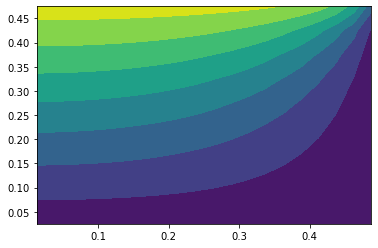

In [46]:
Lx=0.5; Ly=0.5; n = 20; m = 10; nn=n*m; # Geom descretization/mesh
Ta=100; Tb=200; Tc=200; Td=400; # BCs
k=0.5;  # Properties
 
dx = Lx/n;  dy = Ly/m;   
x = np.linspace(dx/2,Lx-dx/2,n); y = np.linspace(dy/2,Ly-dy/2,m); [X, Y]=np.meshgrid(x,y); 

A=np.zeros([nn,nn]); b=np.zeros([nn]); d2=np.zeros([m,n])
dz=1;  G=k; q=0; 

for j in range(m): 
     for i in range(n): 
        P = j*n+i; W = P-1; E = P+1; N=P+n; S=P-n; 
        Aw = dy*dz; Ae=Aw; An=dx*dz; As = An; Su=0; Sp=0; 
        aW = G*Aw/dx; aE = G*Ae/dx; aN = G*An/dy; aS = G*As/dy;
        if(i>0): 
            A[P,W]=-aW; 
        else: 
            aW=0; Sp=Sp; Su=Su + q*Aw*dx; #aW=0; Sp=Sp-2*G*Aw/dx; Su=Su + 2*G*Aw/dx*Ta;
        
        if(i<n-1): 
            A[P,E]=-aE; 
        else:
            aE=0; Sp=Sp-2*G*Ae/dx; Su=Su + 2*G*Ae/dx*Tb;
        if(j>0): 
            A[P,S]=-aS; 
        else:
            aS=0; Sp=Sp-2*G*As/dy; Su=Su + 2*G*As/dy*Tc;
        if(j<m-1): 
            A[P,N]=-aN; 
        else:
            aN=0; Sp=Sp-2*G*An/dy; Su=Su + 2*G*An/dy*Td;
        
        aP = aW + aE + aS + aN - Sp; 
        A[P,P] = aP; 
        b[P]=Su; 

d=np.linalg.solve(A,b);  

for j in range(m):
    for i in range(n):
        IN=j*n+i; d2[j,i]=d[IN];
        
fig = plt.figure()
plt.contourf(X, Y, d2)
plt.show()
